# Time Series Data: Stock Price Prediction

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:80% !important;}</style>"))

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
inp0 = pd.read_csv('AAPL.csv')
inp0.head()

,Date,Close,Open,High,Low,Volume
0,1/17/2020,138.31,136.54,138.330,136.16,5623336
1,1/16/2020,137.98,137.32,138.190,137.01,4320911
2,1/15/2020,136.62,136.00,138.055,135.71,4045952
3,1/14/2020,135.82,136.28,137.139,135.55,3683458
4,1/13/2020,136.60,135.48,136.640,135.07,3531572


In [4]:
inp0.tail()

,Date,Close,Open,High,Low,Volume
2509,1/29/2010,122.39,124.32,125.000,121.90,11571890
2510,1/28/2010,123.75,127.03,127.040,123.05,9616132
2511,1/27/2010,126.33,125.82,126.960,125.04,8719147
2512,1/26/2010,125.75,125.92,127.750,125.41,7135190
2513,1/25/2010,126.12,126.33,126.895,125.71,5738455


# Exercise 5.01: Visualizing our Time Series Data

In [5]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
inp0 = pd.read_csv('AAPL.csv')

Plot the column 'Close' as a line plot to see the pattern using the plot method of the dataframe

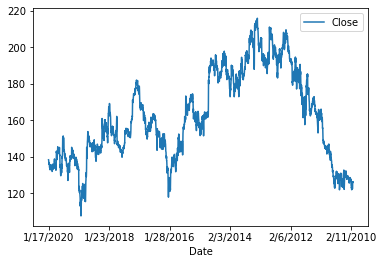

In [7]:
inp0.plot("Date", "Close")
plt.show()

We see that the index is in reverse order - latest date beginning at 0. We’ll reverse the data for convenience of plotting and handling.

In [8]:
inp0 = inp0.sort_index(ascending=False)

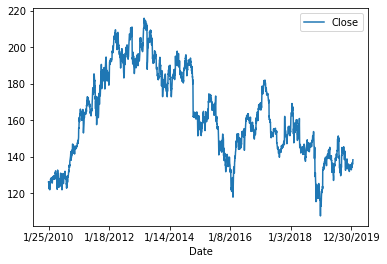

In [9]:
inp0.plot("Date", "Close")
plt.show()

Extract the values for ‘Close’ from the dataframe as a numpy array.

In [10]:
ts_data = inp0.Close.values.reshape(-1,1)

Plot the values as a line plot using matplotlib

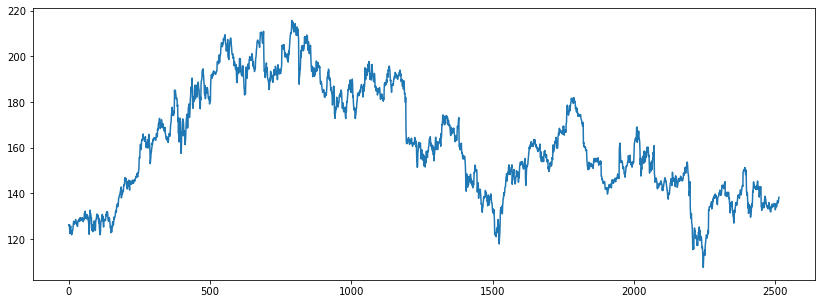

In [11]:
plt.figure(figsize=[14,5])
plt.plot(ts_data)
plt.show()

# Exercise 5.02: Implement the Forward Pass of a Simple RNN using Tensorflow

Import Tensorflow and numpy

In [12]:
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

Define constants ‘num_inputs’ and ‘num_neurons’ holding the number of inputs (2) and the number of neurons in the hidden layer (3) respectively.

In [13]:
num_inputs = 2
num_neurons = 3

Define the variables for the weight matrices. We need two of them – one for the feedforward weights, the other for the recurrent weights. Initialize them randomly.

In [14]:
Wf = tf.Variable(tf.random.normal(shape=[num_inputs, num_neurons]))
Wr = tf.Variable(tf.random.normal(shape=[num_neurons, num_neurons]))

2022-06-24 08:01:28.337564: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Add the bias variable, as many values as the number of neurons in the hidden layer

In [15]:
b = tf.Variable(tf.zeros([1,num_neurons]))

Create the data – 3 examples for xt0 (two inputs, 3 examples) as [[0,1],[2,3],[4,5]] and xt1 as [[100,101],[102,103],[104,105]]

In [16]:
xt0_batch = np.array([[0,1],  [2,3], [4,5]]).astype(np.float32)
xt1_batch = np.array([[100, 101], [102, 103], [104, 105]]).astype(np.float32)

Define function to apply forward pass for given data xt0, xt1

In [17]:
def forward_pass(xt0, xt1):
    yt0 = tf.tanh(tf.matmul(xt0, Wf) + b)
    yt1 = tf.tanh(tf.matmul(yt0, Wr) + tf.matmul(xt1, Wf) + b)
    return yt0, yt1

Perform the forward pass by calling the function with the created data

In [18]:
yt0_output, yt1_output = forward_pass(xt0_batch, xt1_batch)

Print the output values yt0 and yt1

In [19]:
tf.print(yt0_output)

[[-0.776318431 -0.844548464 0.438419849]
 [-0.0857750699 -0.993522227 0.516408086]
 [0.698345721 -0.999749422 0.586677969]]


In [20]:
tf.print(yt1_output)

[[1 -1 0.999998629]
 [1 -1 0.999998331]
 [1 -1 0.999997377]]


### Preparing the Data for Stock Price Prediction

In [21]:
train_recs = int(len(ts_data) * 0.75)

In [22]:
train_data = ts_data[:train_recs]
test_data = ts_data[train_recs:]

In [23]:
len(train_data), len(test_data)

(1885, 629)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

In [26]:
def get_lookback(inp, look_back):       
    y = pd.DataFrame(inp)
    dataX = [y.shift(i) for i in range(1, look_back+1)]
    dataX = pd.concat(dataX, axis=1)
    dataX.fillna(0, inplace = True)
    return dataX.values, y.values

In [27]:
look_back = 10

In [28]:
trainX, trainY = get_lookback(train_scaled, look_back=look_back)
testX, testY = get_lookback(test_scaled, look_back= look_back)

In [28]:
trainX.shape, testX.shape

((1885, 10), (629, 10))

# Exercise 5.03: Building our first plain RNN model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Activation, Dropout, Dense, Reshape

In [31]:
model = Sequential()
model.add(Reshape((look_back,1), input_shape = (look_back,)))
model.add(SimpleRNN(32, input_shape=(look_back, 1)))
model.add(Dense(1))
model.add(Activation('linear'))

In [32]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 10, 1)             0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                1088      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


### Model Training and Performance Evaluation

In [34]:
model.fit(trainX, trainY, epochs=3, batch_size=1, verbose=2, validation_split=0.1)

Train on 1696 samples, validate on 189 samples
Epoch 1/3
1696/1696 - 5s - loss: 0.0036 - val_loss: 0.0016
Epoch 2/3
1696/1696 - 4s - loss: 0.0012 - val_loss: 4.9603e-04
Epoch 3/3
1696/1696 - 4s - loss: 0.0010 - val_loss: 3.6961e-04


In [35]:
import math

In [36]:
def get_model_perf(model_obj):

    score_train = model_obj.evaluate(trainX, trainY, verbose=0)
    print('Train RMSE: %.2f RMSE' % (math.sqrt(score_train)))

    score_test = model_obj.evaluate(testX, testY, verbose=0)
    print('Test RMSE: %.2f RMSE' % (math.sqrt(score_test)))

In [37]:
get_model_perf(model)

Train RMSE: 0.02 RMSE
Test RMSE: 0.03 RMSE


In [38]:
def plot_pred(model_obj):
    testPredict = scaler.inverse_transform(model_obj.predict(testX))
    
    pred_test_plot = ts_data.copy()
    pred_test_plot[:train_recs+look_back,:] = np.nan
    pred_test_plot[train_recs+look_back:,:] = testPredict[look_back:]
    
    plt.plot(ts_data)
    plt.plot(pred_test_plot, "--")

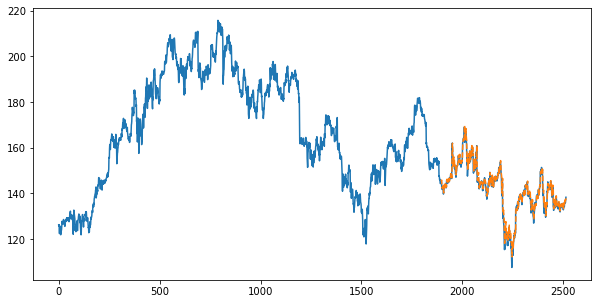

In [39]:
%matplotlib inline
plt.figure(figsize=[10,5])
plot_pred(model)

<IPython.core.display.Javascript object>


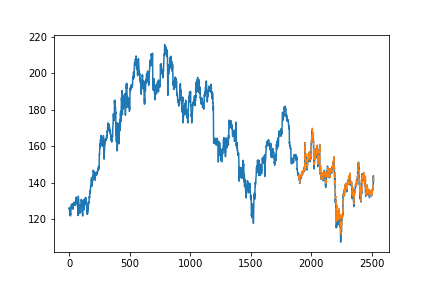

In [78]:
%matplotlib notebook
plot_pred(model)

# Exercise 5.04: Build 1D convolution-based model

In [41]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

In [42]:
model_conv = Sequential()
model_conv.add(Reshape((look_back,1), input_shape = (look_back,)))
model_conv.add(Conv1D(5, 5, activation='relu'))
model_conv.add(MaxPooling1D(5))
model_conv.add(Flatten())
model_conv.add(Dense(1))
model_conv.add(Activation('linear'))

In [43]:
model_conv.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 10, 1)             0         
_________________________________________________________________
conv1d (Conv1D)              (None, 6, 5)              30        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 5)              0         
_________________________________________________________________
flatten (Flatten)            (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 36
Trainable params: 36
Non-trainable params: 0
__________________________________________________________

In [44]:
model_conv.compile(loss='mean_squared_error', optimizer='adam')

In [45]:
model_conv.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2, validation_split=0.1)

Train on 1696 samples, validate on 189 samples
Epoch 1/5
1696/1696 - 2s - loss: 0.0351 - val_loss: 0.0013
Epoch 2/5
1696/1696 - 2s - loss: 0.0022 - val_loss: 0.0020
Epoch 3/5
1696/1696 - 2s - loss: 0.0021 - val_loss: 0.0012
Epoch 4/5
1696/1696 - 2s - loss: 0.0021 - val_loss: 0.0014
Epoch 5/5
1696/1696 - 2s - loss: 0.0020 - val_loss: 0.0011


In [46]:
get_model_perf(model_conv)

Train RMSE: 0.04 RMSE
Test RMSE: 0.05 RMSE


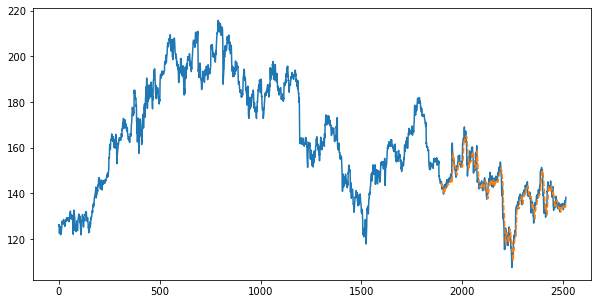

In [47]:
%matplotlib inline
plt.figure(figsize=[10,5])
plot_pred(model_conv)

<IPython.core.display.Javascript object>


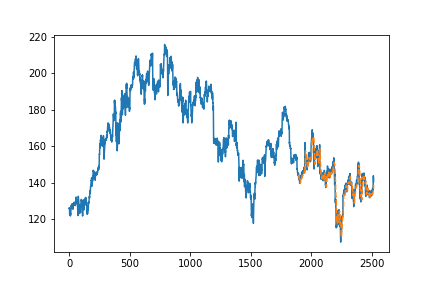

In [79]:
%matplotlib notebook
plot_pred(model_conv)

# Exercise 5.05: Build a hybrid (1D conv + RNN) model

In [49]:
model_comb = Sequential()
model_comb.add(Reshape((look_back,1), input_shape = (look_back,)))
model_comb.add(Conv1D(5, 3, activation='relu'))
model_comb.add(SimpleRNN(32))
model_comb.add(Dense(1))
model_comb.add(Activation('linear'))

In [50]:
model_comb.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 10, 1)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8, 5)              20        
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                1216      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 1,269
Trainable params: 1,269
Non-trainable params: 0
_________________________________________________________________


In [51]:
model_comb.compile(loss='mean_squared_error', optimizer='adam')

In [52]:
model_comb.fit(trainX, trainY, epochs=3, batch_size=1, verbose=2, validation_split=0.1)

Train on 1696 samples, validate on 189 samples
Epoch 1/3
1696/1696 - 4s - loss: 0.0027 - val_loss: 9.8190e-04
Epoch 2/3
1696/1696 - 4s - loss: 0.0012 - val_loss: 5.8988e-04
Epoch 3/3
1696/1696 - 4s - loss: 0.0012 - val_loss: 5.0359e-04


In [53]:
get_model_perf(model_comb)

Train RMSE: 0.03 RMSE
Test RMSE: 0.03 RMSE


<IPython.core.display.Javascript object>


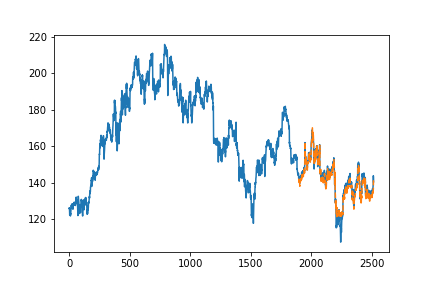

In [80]:
%matplotlib notebook
plot_pred(model_comb)

## Activity 5.01: IBM stock price prediction using RNNs + 1D convnet

1. Load the csv file, reverse the index and plot the time series (‘Close’ column) for visual inspection

In [55]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

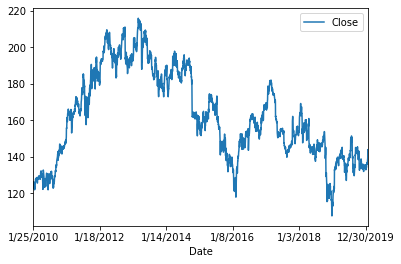

In [56]:
inp0 = pd.read_csv("IBM.csv")
inp0 = inp0.sort_index(ascending=False)
inp0.plot("Date", "Close")
plt.show()

In [57]:
ts_data = inp0.Close.values.reshape(-1,1)

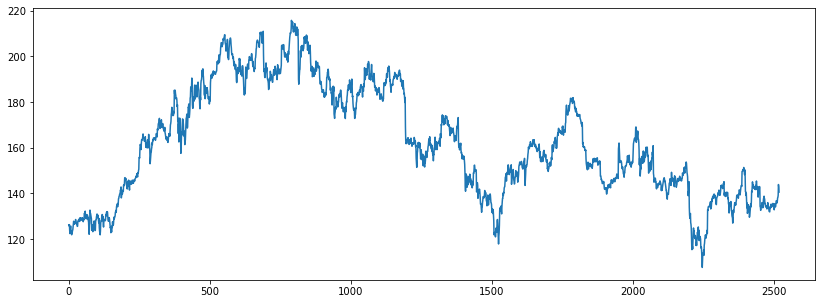

In [58]:
%matplotlib inline
plt.figure(figsize=[14,5])
plt.plot(ts_data)
plt.show()

2. Assign the final 25% data as test data, first 75% as train

In [59]:
train_recs = int(len(ts_data) * 0.75)

In [60]:
train_data = ts_data[:train_recs]
test_data = ts_data[train_recs:]

In [61]:
len(train_data), len(test_data)

(1888, 630)

3. Using MinMaxScaler from sklearn, scale the train and test data

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

4. Using the get_lookback function defined in the chapter, get lookback data for train and the test data using a lookback period of 10.

In [64]:
look_back = 10

In [65]:
trainX, trainY = get_lookback(train_scaled, look_back=look_back)
testX, testY = get_lookback(test_scaled, look_back= look_back)

In [66]:
trainX.shape, testX.shape

((1888, 10), (630, 10))

5. From Keras, import all necessary layers for employing plain RNNs (SimpleRNN, Activation, Dropout, Dense, Reshape) and 1D convolutions (Conv1D). Also import mean_squared_error metric from sklearn

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Activation, Dropout, Dense, Reshape, Conv1D
from sklearn.metrics import mean_squared_error

6. Build a model with a 1D convolution layer (5 filters of size 3) and an RNN layer with 32 neurons. Add 25% dropout after the RNN layer. Print the model’s summary.

In [68]:
model_comb = Sequential()
model_comb.add(Reshape((look_back,1), input_shape = (look_back,)))
model_comb.add(Conv1D(5, 3, activation='relu'))
model_comb.add(SimpleRNN(32))
model_comb.add(Dropout(0.25))
model_comb.add(Dense(1))
model_comb.add(Activation('linear'))

In [69]:
model_comb.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 10, 1)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 8, 5)              20        
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                1216      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 1,269
Trainable params: 1,269
Non-trainable params: 0
____________________________________________________

7. Compile the model with “mean_squared_error” loss and ‘adam’ optimizer. Fit on the train data in 5 epochs, validation split of 10%, batch size of 1.

In [70]:
model_comb.compile(loss='mean_squared_error', optimizer='adam')

In [71]:
model_comb.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2, validation_split=0.1)

Train on 1699 samples, validate on 189 samples
Epoch 1/5
1699/1699 - 4s - loss: 0.0106 - val_loss: 0.0022
Epoch 2/5
1699/1699 - 4s - loss: 0.0046 - val_loss: 9.4285e-04
Epoch 3/5
1699/1699 - 4s - loss: 0.0033 - val_loss: 4.1030e-04
Epoch 4/5
1699/1699 - 4s - loss: 0.0028 - val_loss: 6.9368e-04
Epoch 5/5
1699/1699 - 4s - loss: 0.0020 - val_loss: 4.7287e-04


8. Using the get_model_perf method, print the RMSE from the model.

In [72]:
get_model_perf(model_comb)

Train RMSE: 0.03 RMSE
Test RMSE: 0.03 RMSE


9. Plot the predictions - the entire view, as well as zoomed in view

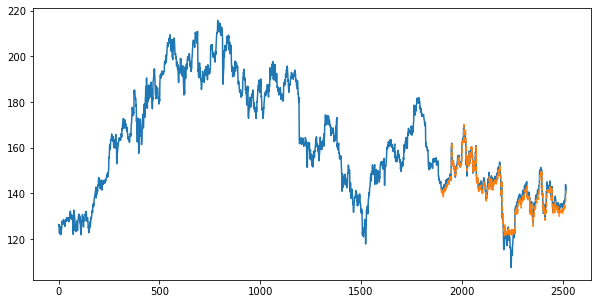

In [73]:
%matplotlib inline
plt.figure(figsize=[10,5])
plot_pred(model_comb)

<IPython.core.display.Javascript object>


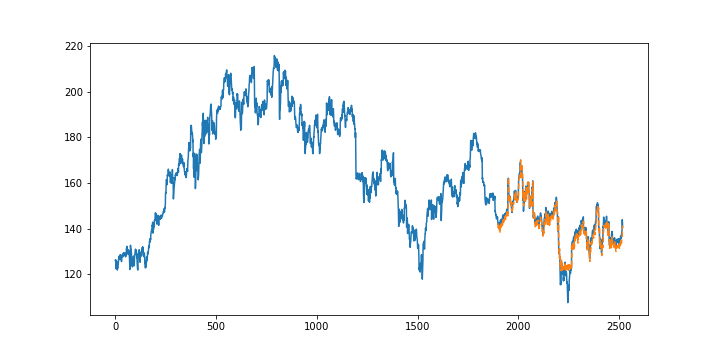

In [81]:
%matplotlib notebook
plt.figure(figsize=[10,5])
plot_pred(model_comb)